In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

### Reading csv file and getting the dataframe

In [191]:
df = pd.read_csv('/home/avnik/code/machine_learning/fraud_test_synthetic/fraudTrain.csv')
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [163]:
df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [192]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'] )

### Creating balanced dataframe (equal fraud and non-fraud)

In [169]:
fraud_trans = df[df['is_fraud'] == 1]
non_fraud_trans = df[df['is_fraud'] == 0]

len_fraud = len(fraud_trans)
# new_non_fraud = non_fraud_trans.iloc[:len_fraud]
rand_non_fraud = non_fraud_trans.sample(n=len_fraud, random_state=42)

balanced_df = pd.concat([fraud_trans, rand_non_fraud])
balanced_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
2449,2449,2019-01-02 01:06:37,4613314721966,fraud_Rutherford-Mertz,grocery_pos,281.06,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,e8a81877ae9a0a7f883e15cb39dc4022,1325466397,36.430124,-81.179483,1
2472,2472,2019-01-02 01:47:29,340187018810220,"fraud_Jenkins, Hauck and Friesen",gas_transport,11.52,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,bc7d41c41103877b03232f03f1f8d3f5,1325468849,29.819364,-99.142791,1
2523,2523,2019-01-02 03:05:23,340187018810220,fraud_Goodwin-Nitzsche,grocery_pos,276.31,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,b98f12f4168391b2203238813df5aa8c,1325473523,29.273085,-98.836360,1
2546,2546,2019-01-02 03:38:03,4613314721966,fraud_Erdman-Kertzmann,gas_transport,7.03,Jason,Murphy,M,542 Steve Curve Suite 011,...,35.9946,-81.7266,885,Soil scientist,1988-09-15,397894a5c4c02e3c61c784001f0f14e4,1325475483,35.909292,-82.091010,1
2553,2553,2019-01-02 03:55:47,340187018810220,fraud_Koepp-Parker,grocery_pos,275.73,Misty,Hart,F,27954 Hall Mill Suite 575,...,29.4400,-98.4590,1595797,Horticultural consultant,1960-10-28,7863235a750d73a244c07f1fb7f0185a,1325476547,29.786426,-98.683410,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477760,477760,2019-07-28 19:07:55,3535808924394848,fraud_Rolfson-Kunde,personal_care,74.48,Matthew,Myers,M,4936 Michelle Points,...,39.3900,-88.9597,1532,Radio broadcast assistant,1980-01-09,593bdc0a78787937f830255da11fc6ab,1343502475,40.291688,-89.521832,0
1215574,1215574,2020-05-23 22:31:58,38797410705641,fraud_Kihn-Schuster,food_dining,62.22,Andrew,Tucker,M,583 Gray Creek,...,42.4069,-74.1528,277,Glass blower/designer,1971-12-12,73db207aa6a2ca86000e48f8cb4c17a9,1369348318,41.628510,-73.676442,0
437865,437865,2019-07-14 16:12:49,6011999606625827,fraud_Erdman-Ebert,personal_care,49.65,Ronald,Carson,M,870 Rocha Drive,...,40.9918,-73.9800,4664,"Radiographer, diagnostic",1965-06-30,f866515a22204cd3b47cb381ca2fc4f6,1342282369,40.763702,-73.699295,0
1047310,1047310,2020-03-10 05:59:33,3527063666782582,fraud_Boyer PLC,shopping_net,3.62,Amanda,Alexander,F,21810 James Mall,...,30.9000,-94.7547,99,Colour technologist,1965-11-21,b528c569a413a1d67d9a027fb7447b52,1362895173,30.484955,-93.916328,0


In [170]:
balanced_df = balanced_df.sort_values('unix_time').reset_index(drop=True)
balanced_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,550,2019-01-01 07:11:55,377026671291680,fraud_Conroy-Cruickshank,gas_transport,71.06,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,37.3272,-91.0243,241,Investment analyst,1974-10-27,a29812ac63e9b065046efd387a6ec8b5,1325401915,36.447073,-91.941927,0
1,795,2019-01-01 10:10:27,2706977570537524,fraud_Huels-Nolan,gas_transport,70.17,David,Serrano,M,4739 Martin Common,...,39.2830,-82.3977,341,Accounting technician,1978-12-18,eb302eff8b585b8084a2d2490284c174,1325412627,38.340454,-81.412293,0
2,841,2019-01-01 10:45:15,30044330818990,fraud_DuBuque LLC,grocery_pos,176.63,Allison,Ayala,F,87665 Karen Mill Apt. 586,...,26.4722,-81.8122,224256,Paramedic,1985-08-29,17b19b638a84495b28677e1072c4ea24,1325414715,26.258936,-81.972659,0
3,904,2019-01-01 11:26:05,376656886990758,fraud_Berge LLC,gas_transport,68.32,Richard,Vance,M,169 Shelia Knoll Suite 753,...,31.1569,-94.3871,2836,"Designer, jewellery",1985-12-03,a62f4403b5bda36eeb132f0ddc62b6f2,1325417165,31.680455,-94.084240,0
4,975,2019-01-01 12:26:57,30487648872433,fraud_Bednar Inc,travel,5.09,Stephanie,Crane,F,144 Martinez Curve,...,38.0970,-86.1723,350,Counsellor,1955-01-05,fe537bb2ec779ae3a337d50a3c7a7dfd,1325420817,37.653705,-86.315351,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,1296161,2020-06-21 07:39:51,4956828990005111019,fraud_Hudson-Ratke,grocery_pos,44.64,Kenneth,Robinson,M,269 Sanchez Rapids,...,40.6747,-74.2239,124967,Operational researcher,1980-12-21,e639d78ff9f039a272f686e6c25ff05c,1371800391,40.598455,-73.983459,0
15008,1296178,2020-06-21 07:50:21,4562827002127,fraud_Kilback LLC,grocery_pos,72.42,Christopher,Johnson,M,28711 Kristine Junction Suite 309,...,40.0987,-84.6342,22930,Media planner,1971-11-26,808b43be603423b47641b83d74eb02fe,1371801021,40.484867,-84.497334,0
15009,1296202,2020-06-21 08:00:19,4561892980175,fraud_Luettgen PLC,gas_transport,62.83,Jacqueline,Allen,F,166 Lisa Fords,...,39.5960,-86.1309,78968,Financial adviser,1968-02-10,9b7f77981d9db7d16235eaa74e999455,1371801619,39.206478,-86.043690,0
15010,1296302,2020-06-21 08:54:09,3511378610369890,fraud_Cummings LLC,gas_transport,69.20,James,Cooper,M,663 Ramirez Trace Apt. 951,...,34.7789,-86.5438,190178,Television production assistant,1973-04-01,15672f29e92a61ef84fc2a79c3cc9788,1371804849,35.181963,-87.095034,0


In [171]:
balanced_df['is_fraud'].value_counts()

is_fraud
0    7506
1    7506
Name: count, dtype: int64

### Analysing data types of balanced_df

In [193]:
balanced_df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                              object
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [173]:
# dataframe of only non_integers / floats. will manipulate this to decide how to encode actual df
non_objects = [x for x in balanced_df if balanced_df[x].dtype != object]
print(non_objects)
object_df = balanced_df.drop(non_objects, axis=1)
object_df

['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
0,fraud_Conroy-Cruickshank,gas_transport,Jackie,Davis,F,1898 Parker Fork Apt. 057,Redford,MO,Investment analyst,1974-10-27,a29812ac63e9b065046efd387a6ec8b5
1,fraud_Huels-Nolan,gas_transport,David,Serrano,M,4739 Martin Common,Zaleski,OH,Accounting technician,1978-12-18,eb302eff8b585b8084a2d2490284c174
2,fraud_DuBuque LLC,grocery_pos,Allison,Ayala,F,87665 Karen Mill Apt. 586,Fort Myers,FL,Paramedic,1985-08-29,17b19b638a84495b28677e1072c4ea24
3,fraud_Berge LLC,gas_transport,Richard,Vance,M,169 Shelia Knoll Suite 753,Zavalla,TX,"Designer, jewellery",1985-12-03,a62f4403b5bda36eeb132f0ddc62b6f2
4,fraud_Bednar Inc,travel,Stephanie,Crane,F,144 Martinez Curve,Central,IN,Counsellor,1955-01-05,fe537bb2ec779ae3a337d50a3c7a7dfd
...,...,...,...,...,...,...,...,...,...,...,...
15007,fraud_Hudson-Ratke,grocery_pos,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,Operational researcher,1980-12-21,e639d78ff9f039a272f686e6c25ff05c
15008,fraud_Kilback LLC,grocery_pos,Christopher,Johnson,M,28711 Kristine Junction Suite 309,Greenville,OH,Media planner,1971-11-26,808b43be603423b47641b83d74eb02fe
15009,fraud_Luettgen PLC,gas_transport,Jacqueline,Allen,F,166 Lisa Fords,Greenwood,IN,Financial adviser,1968-02-10,9b7f77981d9db7d16235eaa74e999455
15010,fraud_Cummings LLC,gas_transport,James,Cooper,M,663 Ramirez Trace Apt. 951,Huntsville,AL,Television production assistant,1973-04-01,15672f29e92a61ef84fc2a79c3cc9788


In [77]:
print(object_df.columns)

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')


### Box plots of streets
These are two arrays containing the number of times a street name has been repeated. Found out there's not really anything to glean from this

In [78]:
fraud_trans[['street', 'is_fraud']].value_counts()
fraud_trans['street'].value_counts()

street
5205 Annette Islands Apt. 043     19
15315 Vaughn Park Suite 356       19
0374 Courtney Islands Apt. 400    18
537 Rice Square Suite 040         16
889 Sarah Station Suite 624       16
                                  ..
72269 Elizabeth Field Apt. 132     2
312 Eric Expressway Apt. 014       2
686 Linda Rest                     2
594 Berry Lights Apt. 392          2
458 Phillips Island Apt. 768       2
Name: count, Length: 762, dtype: int64

In [194]:
rand_non_fraud[['street', 'is_fraud']].value_counts()
rand_non_fraud['street'].value_counts()

street
5395 Colon Burgs Suite 037             31
561 Little Plain Apt. 738              28
11014 Chad Lake Apt. 573               26
43039 Riley Greens Suite 393           25
17666 David Valleys                    24
                                       ..
54220 April Union Suite 403             1
737 Thomas Wall Apt. 502                1
994 Livingston Extensions Suite 918     1
5812 Ramos Oval Suite 598               1
05561 Farrell Crescent                  1
Name: count, Length: 889, dtype: int64

In [97]:
fraud_streets = np.array(fraud_trans['street'].value_counts())

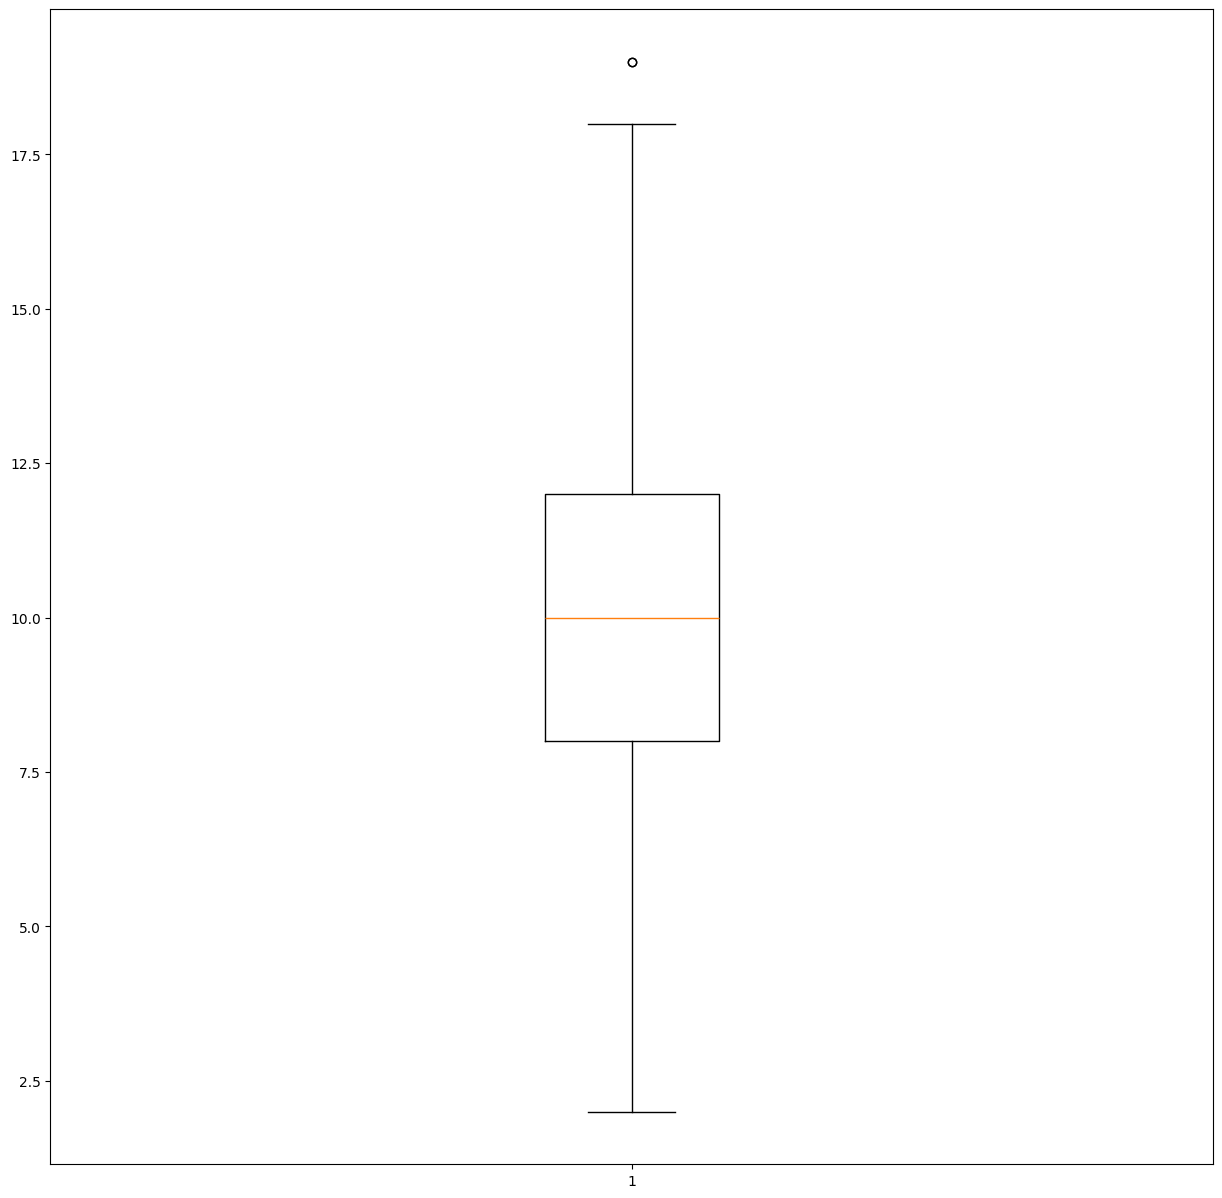

In [175]:
fig = plt.figure(figsize =(15, 15))

plt.boxplot(fraud_streets)
plt.show()

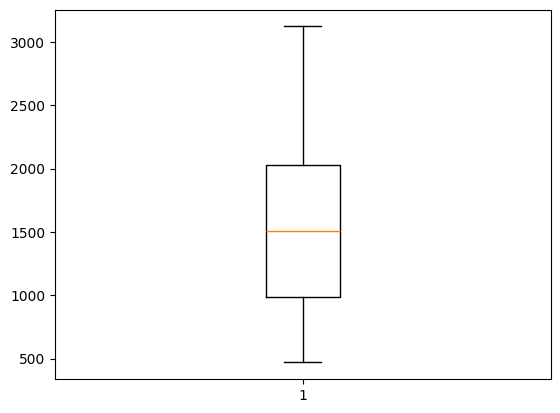

In [177]:
non_fraud_streets = np.array(non_fraud_trans['street'].value_counts())
plt.boxplot(non_fraud_streets)
plt.show()

# note: cannot compare these two boxplots, there are way too many non-fraudulent transactions. But this is better than using new_non_fraud, which is self-made

### Analysing purpose of transaction
Might try bar charts? Or boxplots?

In [180]:
non_fraud_trans['category'].value_counts()
# rand_non_fraud['category'].value_counts()

category
gas_transport     131041
home              122917
grocery_pos       121895
shopping_pos      115829
kids_pets         112796
shopping_net       95830
entertainment      93781
food_dining        91310
personal_care      90538
health_fitness     85746
misc_pos           79405
misc_net           62372
grocery_net        45318
travel             40391
Name: count, dtype: int64

In [ ]:
fraud_trans['category'].value_counts()
# was right about high number of online fraud transactions (_net). Didn't expect the highest to be grocery_pos (is this why I get stopped at the checkout so much?) did not expect low number of grocery_net

category
grocery_pos       1743
shopping_net      1713
misc_net           915
shopping_pos       843
gas_transport      618
misc_pos           250
kids_pets          239
entertainment      233
personal_care      220
home               198
food_dining        151
grocery_net        134
health_fitness     133
travel             116
Name: count, dtype: int64

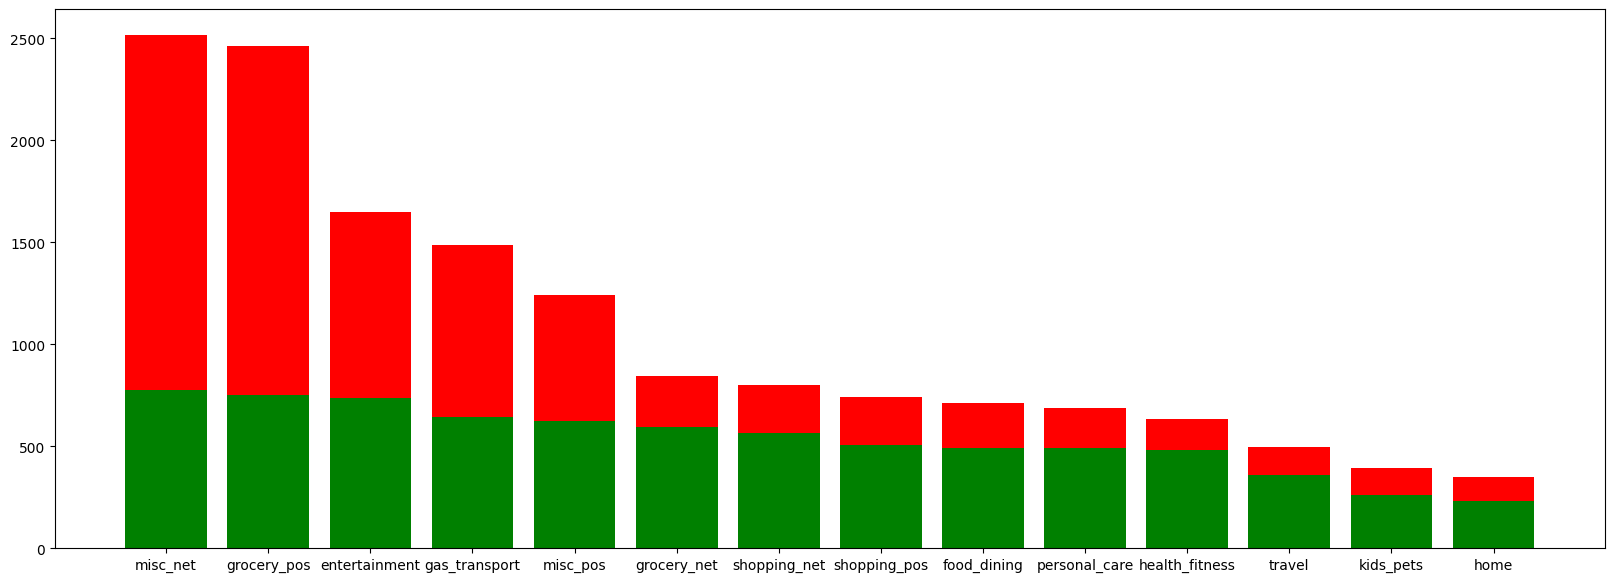

In [190]:
categories = df['category'].unique().tolist()

non_fraud_cats = np.array(rand_non_fraud['category'].value_counts())
fraud_cats = np.array(fraud_trans['category'].value_counts())

fig = plt.figure(figsize=(20, 7))
plt.bar(categories, non_fraud_cats, color='g')
plt.bar(categories, fraud_cats, bottom=non_fraud_cats, color='r')
plt.show()

### Analysing amount spent

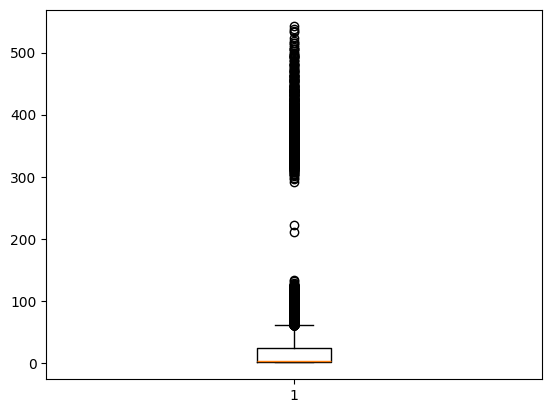

In [211]:
non_fraud_amounts = non_fraud_trans['amt'].value_counts().tolist()
plt.boxplot(non_fraud_amounts)
plt.show()

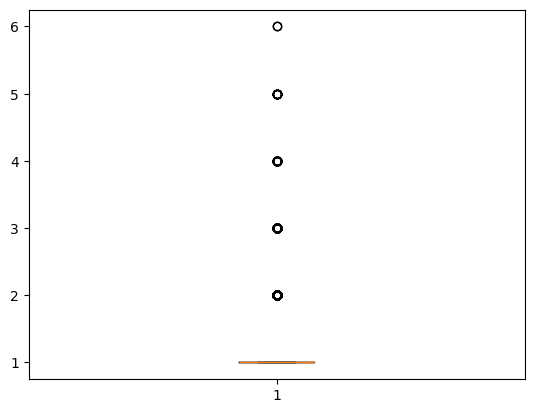

In [212]:
fraud_amounts = fraud_trans['amt'].value_counts().tolist()
plt.boxplot(fraud_amounts)
plt.show()

### Random analysis
Includes: analysing jobs, attempt at feature engineering

In [107]:
fraud_trans['job'].unique().tolist()

['Soil scientist',
 'Horticultural consultant',
 'Public affairs consultant',
 'Administrator, education',
 'Cytogeneticist',
 'Scientist, biomedical',
 'Geochemist',
 'Engineer, automotive',
 'Psychotherapist, child',
 'Medical technical officer',
 'Financial adviser',
 'Financial trader',
 'Event organiser',
 'Retail merchandiser',
 'Solicitor, Scotland',
 'Glass blower/designer',
 'Surveyor, land/geomatics',
 'Science writer',
 'Research officer, trade union',
 'Product designer',
 'Geologist, wellsite',
 'Scientist, research (maths)',
 'Engineer, mining',
 'Audiological scientist',
 'Nutritional therapist',
 'Pilot, airline',
 'Surveyor, minerals',
 'Multimedia programmer',
 'Sales professional, IT',
 'Agricultural consultant',
 'Accounting technician',
 'Records manager',
 'Illustrator',
 'Hospital doctor',
 'Chartered public finance accountant',
 'Environmental consultant',
 'Engineer, building services',
 'Marketing executive',
 'Restaurant manager, fast food',
 'Television floo

In [108]:
non_fraud_trans['job'].unique().tolist()

['Psychologist, counselling',
 'Special educational needs teacher',
 'Nature conservation officer',
 'Patent attorney',
 'Dance movement psychotherapist',
 'Transport planner',
 'Arboriculturist',
 'Designer, multimedia',
 'Public affairs consultant',
 'Pathologist',
 'IT trainer',
 'Systems developer',
 'Engineer, land',
 'Systems analyst',
 'Naval architect',
 'Radiographer, diagnostic',
 'Programme researcher, broadcasting/film/video',
 'Energy engineer',
 'Event organiser',
 'Operational researcher',
 'Market researcher',
 'Probation officer',
 'Leisure centre manager',
 'Corporate investment banker',
 'Therapist, occupational',
 'Call centre manager',
 'Police officer',
 'Education officer, museum',
 'Physiotherapist',
 'Network engineer',
 'Forensic psychologist',
 'Geochemist',
 'Armed forces training and education officer',
 'Designer, furniture',
 'Optician, dispensing',
 'Psychologist, forensic',
 'Librarian, public',
 'Fine artist',
 'Scientist, research (maths)',
 'Research

In [109]:
fraud_jobs = fraud_trans['job'].unique().tolist()
non_fraud_jobs = non_fraud_trans['job'].unique().tolist()

both_jobs = []

for job in fraud_jobs:
    if job in non_fraud_jobs:
        both_jobs.append(job)

both_jobs

['Soil scientist',
 'Horticultural consultant',
 'Public affairs consultant',
 'Administrator, education',
 'Cytogeneticist',
 'Scientist, biomedical',
 'Geochemist',
 'Engineer, automotive',
 'Psychotherapist, child',
 'Medical technical officer',
 'Financial adviser',
 'Financial trader',
 'Event organiser',
 'Retail merchandiser',
 'Solicitor, Scotland',
 'Glass blower/designer',
 'Surveyor, land/geomatics',
 'Science writer',
 'Research officer, trade union',
 'Product designer',
 'Geologist, wellsite',
 'Scientist, research (maths)',
 'Engineer, mining',
 'Audiological scientist',
 'Nutritional therapist',
 'Pilot, airline',
 'Surveyor, minerals',
 'Multimedia programmer',
 'Sales professional, IT',
 'Agricultural consultant',
 'Accounting technician',
 'Records manager',
 'Illustrator',
 'Hospital doctor',
 'Chartered public finance accountant',
 'Environmental consultant',
 'Engineer, building services',
 'Marketing executive',
 'Restaurant manager, fast food',
 'Television floo

In [202]:
rand_non_fraud['cc_num'].value_counts()

cc_num
30238755902988         31
630451534402           28
4716561796955522       26
630423337322           25
180094419304907        24
                       ..
676326610042            1
213186551511454         1
3598895972308782        1
4666314527820883145     1
6011975266774121        1
Name: count, Length: 889, dtype: int64